<a href="https://colab.research.google.com/github/Jalalbaim/Number_Plate_Recognition/blob/main/NumberPlate_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os
#d4e1456f66ac2f1379f227353e8a10fc
od.download("https://www.kaggle.com/datasets/otoluk/latvian-car-number-plates")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamedjalalbaim
Your Kaggle Key: ··········


100%|██████████| 5.15M/5.15M [00:01<00:00, 3.86MB/s]


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

import tensorflow as tf
import cv2
from tensorflow import keras

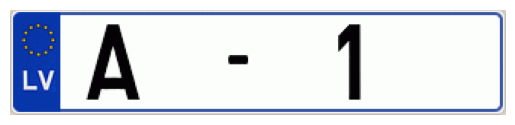

In [4]:
# Exploring data
data = '/content/latvian-car-number-plates/EU-flag/A-1.png'
img = cv2.imread(data)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

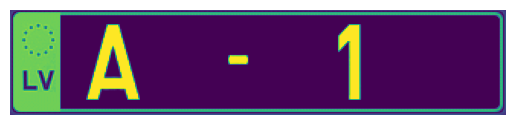

In [5]:
# Background correction

def bck_corr(img):
  # image doit etre lue en grayscale
  s = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35, 35))
  img_sns_imgond = cv2.morphologyEx(img, cv2.MORPH_CLOSE, s)
  img_correction = img_sns_imgond - img
  return img_correction

# test
f = cv2.imread(data, cv2.IMREAD_GRAYSCALE)
f_corrige = bck_corr(f)
plt.imshow(f_corrige)
plt.axis('off')
plt.show()


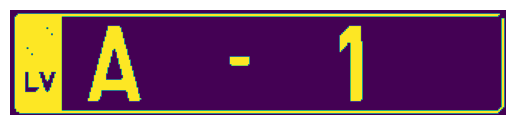

In [6]:
# segmentation
def segmentation(img):
  _, image_segmentee = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  # post traitement
  so = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
  f_open = cv2.morphologyEx(image_segmentee, cv2.MORPH_OPEN, so)
  return f_open

# test
f_open = segmentation(f_corrige)
plt.imshow(f_open)
plt.axis('off')
plt.show()

In [14]:
# etiquetatge de l'image
def labeling(img):
  x1, y1, x2, y2 = 49, 10, 310, 61
  f_crop = img[y1:y2, x1:x2]

  _, labels, stats, centroids = cv2.connectedComponentsWithStats(f_crop, connectivity=4)

  regions_path = []
  # crop regions
  for label in range(1, labels.max() + 1):
    mask = (labels == label).astype(np.uint8)
    region_cropee = cv2.bitwise_and(f_crop, f_crop, mask=mask)
    nom_fichier = f"/content/latvian-car-number-plates/regions/region_{label}.png"
    cv2.imwrite(nom_fichier, region_cropee)
    regions_path.append(nom_fichier)

  return regions_path


In [15]:
l = labeling(f_open)
l

['/content/latvian-car-number-plates/regions/region_1.png',
 '/content/latvian-car-number-plates/regions/region_2.png',
 '/content/latvian-car-number-plates/regions/region_3.png']